# DRILL: Prepare the Data
Unit 2 / Lesson 4 / Project 2

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features. 
Robbery and Murder are currently continuous variables. 
For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.
You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.

Don't forget basic data cleaning procedures, either!
Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# suppress annoying harmless error
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')
warnings.filterwarnings("ignore",category =RuntimeWarning)

In [2]:
# load data into a data frame
PATH = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')

df_raw = pd.read_csv(PATH, skiprows=[0,1,2,3])

# rename columns
df_raw.columns = ['city', 'pop', 'violent_crime', 'murder', 'rape_revised', 'rape_legacy',
              'robbery', 'assault', 'property_crime', 'burglary', 'larceny',
              'vehical_theft', 'arson']
# subset the data frame for the columns we need
df = df_raw.loc[:,['city', 'pop', 'murder', 'robbery', 'property_crime']]

# view data
df.head()

,city,pop,murder,robbery,property_crime
0,Adams Village,"1,861",0.000,0,12
1,Addison Town and Village,"2,577",0.000,0,24
2,Akron Village,"2,846",0.000,0,16
3,Albany,"97,956",8.000,227,"4,090"
4,Albion Village,"6,388",0.000,4,223


In [3]:
# clean population data
df['pop'] = df['pop'].str.replace(',','')

#df['pop'].value_counts()

df['pop'] = df['pop'].apply(pd.to_numeric, errors='coerce')

df['pop'].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: pop, dtype: float64

In [4]:
# clean property_crime data
df['property_crime'] = df['property_crime'].str.replace(',','')

#df['property_crime'].value_counts()

df['property_crime'] = df['property_crime'].apply(pd.to_numeric, errors='coerce')

df['property_crime'].describe()

count      348.000
mean       792.606
std       7659.725
min          0.000
25%         40.500
50%        112.500
75%        341.000
max     141971.000
Name: property_crime, dtype: float64

In [5]:
# create a categorical murder feature
df['murder_raw'] = df['murder']

display(df['murder'].describe())

df['murder'] = np.where(df['murder_raw'] >= 1, 1, 0)

df['murder'].describe()

count   348.000
mean      1.566
std      18.304
min       0.000
25%       0.000
50%       0.000
75%       0.000
max     335.000
Name: murder, dtype: float64

count   351.000
mean      0.140
std       0.347
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       1.000
Name: murder, dtype: float64

In [14]:
# create a categorical robbery feature
df['robbery'] = df['robbery'].apply(pd.to_numeric, errors='coerce')

df['robbery_raw'] = df['robbery']

display(df['robbery'].describe())

df['robbery'] = np.where(df['robbery_raw'] >= 1, 1, 0)

df['robbery'].describe()

count   346.000
mean     14.098
std      64.046
min       0.000
25%       0.000
50%       1.000
75%       5.000
max     918.000
Name: robbery, dtype: float64

count   346.000
mean      0.598
std       0.491
min       0.000
25%       0.000
50%       1.000
75%       1.000
max       1.000
Name: robbery, dtype: float64

In [15]:
# create a populaton squared feature
df['pop_sq'] = df['pop']**2

In [16]:
# drop any NaN values
df = df.dropna()

In [29]:
# deal with outliers

display(df.query('pop > 118296'))
display(df.query('murder_raw > 8'))
display(df.query('robbery_raw > 200'))

,city,pop,murder,robbery,property_crime,murder_raw,robbery_raw,pop_sq,log_pcrime
272,Rochester,210562.000,1,1,10051.000,42.000,918.000,44336355844.000,9.215
310,Syracuse,143834.000,1,1,6473.000,21.000,400.000,20688219556.000,8.775
346,Yonkers,199134.000,1,1,2368.000,6.000,390.000,39654349956.000,7.770


,city,pop,murder,robbery,property_crime,murder_raw,robbery_raw,pop_sq,log_pcrime
140,Hempstead Village,55198.000,1,1,958.000,10.000,204.000,3046819204.000,6.865
272,Rochester,210562.000,1,1,10051.000,42.000,918.000,44336355844.000,9.215
310,Syracuse,143834.000,1,1,6473.000,21.000,400.000,20688219556.000,8.775


,city,pop,murder,robbery,property_crime,murder_raw,robbery_raw,pop_sq,log_pcrime
3,Albany,97956.000,1,1,4090.000,8.000,227.000,9595377936.000,8.316
140,Hempstead Village,55198.000,1,1,958.000,10.000,204.000,3046819204.000,6.865
206,Mount Vernon,68071.000,1,1,1436.000,2.000,228.000,4633661041.000,7.270
272,Rochester,210562.000,1,1,10051.000,42.000,918.000,44336355844.000,9.215
285,Schenectady,66041.000,1,1,2800.000,8.000,203.000,4361413681.000,7.937
310,Syracuse,143834.000,1,1,6473.000,21.000,400.000,20688219556.000,8.775
346,Yonkers,199134.000,1,1,2368.000,6.000,390.000,39654349956.000,7.770


It appears most of our outliers are highly-populated cities, such as New York, Albany, Buffalo, etc.
While the prescence of outliers may affect the performance of our model, keeping data on these cities is necessary for our model to have any meaning.
A model attempting to analyze cr

In [25]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime'].values.reshape(-1, 1)
X = df[['pop','murder','robbery', 'pop_sq']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.74484222e-02 1.84108343e+02 6.20590973e+01 7.28298915e-08]]

Intercept: 
 [-35.4533232]

R-squared:
0.7572767492305856


The model where the outcome `Property Crime` is predicted by the features `Murder`, `Robbery`, and `Population**2` explains 75.7% of the variance in `Property Crime`.

Looking at the coefficients, there appears to be a negative base rate of `Property Crime` that happens even when no murders or robberies occur (intercept: -35.453) and it looks like `Robbery` has the highest per-unit effect on `Property Crime` (6.20590973e+01).

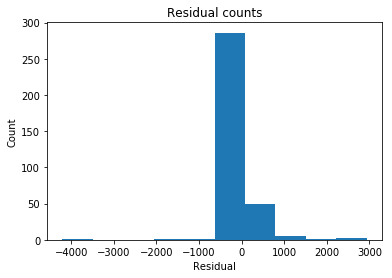

In [26]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# view the residual
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

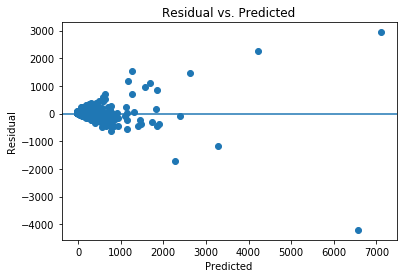

In [27]:
# check for homoscedascity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [28]:
# check for correlation
correlation_matrix = X.corr()
display(correlation_matrix)

,pop,murder,robbery,pop_sq
pop,1.000,0.505,0.369,0.881
murder,0.505,1.000,0.308,0.355
robbery,0.369,0.308,1.000,0.171
pop_sq,0.881,0.355,0.171,1.000


Looking at our diagnostic plots, it looks like we can improve upon our model.
The it looks like our model is suffering from a non-normal distribution and heteroscedascity.
Looking at our correlation matrix, it looks like `population` and `population**2` are highly correlated (0.881), which can be expected.